In [176]:
from tensorflow import keras

from astropy.io import fits
from astropy.table import Table
from astropy.io.fits import Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import richardsplot
import os

In [177]:
dat = pd.read_csv("../data/HST_Chandra_Redshifts.csv")
dat

,Identifier,Data_Set,L1550,SDSS,OtherOpt,No_Optical,Best_z,Ref_z,SDSS_filename
0,002019.22-110609.2,HST,8.850000e+29,True,False,False,0.492049,HW10,spSpec-52145-0653-300_skysub.fit
1,082024.21+233450.4,HST,7.830000e+29,True,False,False,0.470576,HW10,spSpec-53317-1926-378_skysub.fit
2,082658.85+061142.6,HST,9.610000e+29,True,False,False,0.495792,HW10,spSpec-52738-1296-050_comb.fit
3,083332.92+164411.0,HST,8.290000e+29,True,False,False,0.460528,HW10,spSpec-53712-2276-508_skysub.fit
4,083510.36+035901.1,HST,6.300000e+29,True,False,False,0.492039,HW10,spSpec-52646-1186-098_skysub.fit
5,085116.14+424328.8,HST,1.030000e+30,True,False,False,0.482517,HW10,spSpec-52592-0896-063_skysub.fit
6,091451.42+421957.0,HST,7.440000e+29,True,False,False,0.549563,HW10,spSpec-52674-1201-225_skysub.fit
7,093502.52+433110.6,HST,3.890000e+30,True,False,False,0.458625,HW10,spSpec-52325-0870-080_comb.fit
8,100054.96+262242.4,HST,7.170000e+29,True,False,False,0.505782,HW10,spSpec-53740-2344-538_skysub.fit
9,103320.65+274024.2,HST,9.280000e+29,True,False,False,0.535694,HW10,spSpec-53794-2353-600_skysub.fit


In [178]:
! ls ../data/

10c_flux_weight_data                   LOFAR_spectra
DR14_zmin039_zmax068.csv               RebinnedHSTData
DR14_zmin2085_zmax4227.csv             VLAspectra_all8403
DR14_zmin209_zmax228.csv               grdr7.8403col.radec.platemjdfiber.csv
HST_Chandra_Redshifts.csv              s7_flux_weight_data
HST_Reconstructions                    speclist_8403_VLA_colselected.txt
HST_SDSS_Data                          speclist_LOFAR.txt
HST_train                              total_flux_weight_data
LOFAR_from8403colorselected_all388.csv


In [179]:
path = "../data/HST_SDSS_Data/"

In [180]:
for spec in os.listdir(path):
    if not spec.startswith("."):
        hdul_spec = fits.open(path+spec)
        z      = dat["Best_z"][dat["Identifier"]==spec[5:23]].values
        wav   = hdul_spec[1].data["Wavelength"]# / (1+z)
        print(min(wav), min(wav/(1+z)), max(wav), max(wav/(1+z)), z)

1672.6304546595625 1102.578583272015 9223.590216915696 6080.083622606534 [0.517017]
1703.7269765132723 1149.7149724525395 9212.977276718377 6217.133415111847 [0.481869]
1684.224575082704 1150.0110787035997 9223.590216915556 6297.990833172683 [0.464529]
1666.86335888775 1142.7634648300625 9217.22098662202 6319.1162818558705 [0.458625]
1663.7957093870014 1073.719306273447 9223.5902169158 5952.38155332555 [0.549563]
1616.218226106614 1075.9846334101474 9219.343574549477 6137.705822214537 [0.502083]
1664.1788566165847 1131.6510378359123 9223.59021691579 6272.093531320918 [0.470576]
1663.0296795457843 1121.760950832796 9223.59021691581 6221.574671262326 [0.482517]
1664.5620920792376 1128.2940735619195 9223.59021691579 6252.04804809071 [0.475291]
1663.0296795457843 1114.594547193681 9249.111180798143 6198.932595912161 [0.492049]
1670.3212258150436 1144.784846385056 9223.590216915725 6321.55428931835 [0.45907]
1664.1788566165847 1112.5737111955302 9215.09888738286 6160.6820248957465 [0.495792

[0.492049] 002019.22-110609.2
1114.594547193681 6198.932595912161


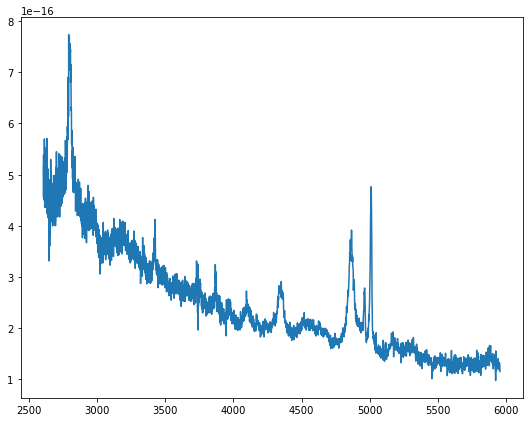

[0.470576] 082024.21+233450.4
1131.6510378359123 6272.093531320918


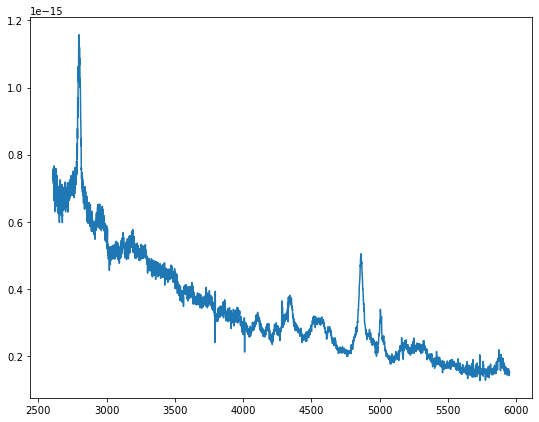

[0.495792] 082658.85+061142.6
1112.5737111955302 6160.6820248957465


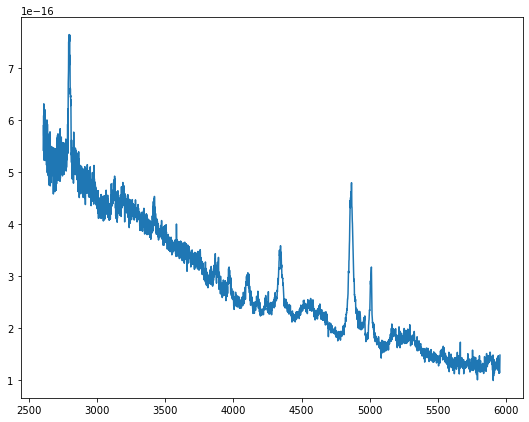

[0.460528] 083332.92+164411.0
1138.9118526794211 6332.717469845244


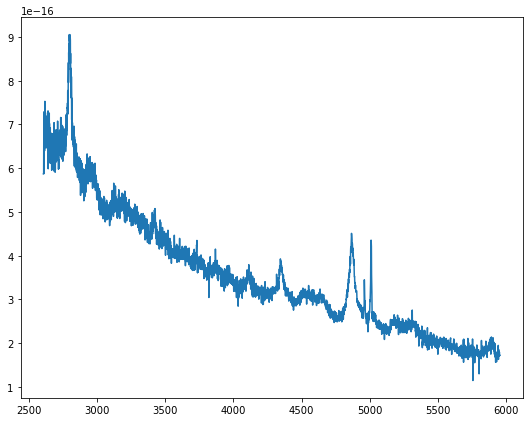

[0.492039] 083510.36+035901.1
1115.1154288775301 6181.869386065511


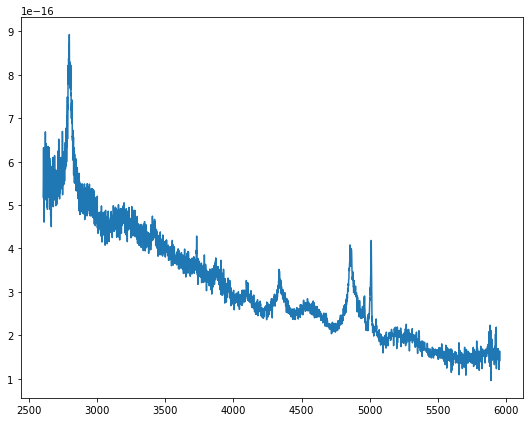

[0.482517] 085116.14+424328.8
1121.760950832796 6221.574671262326


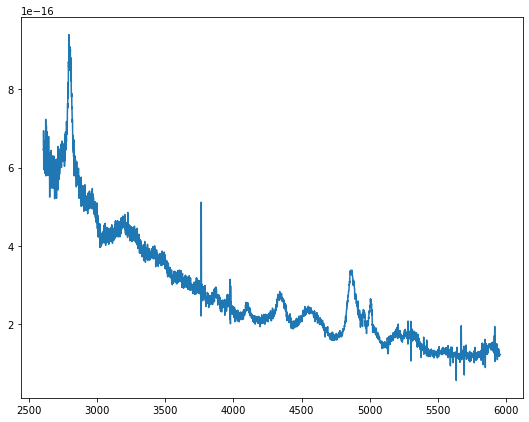

[0.549563] 091451.42+421957.0
1073.719306273447 5952.38155332555


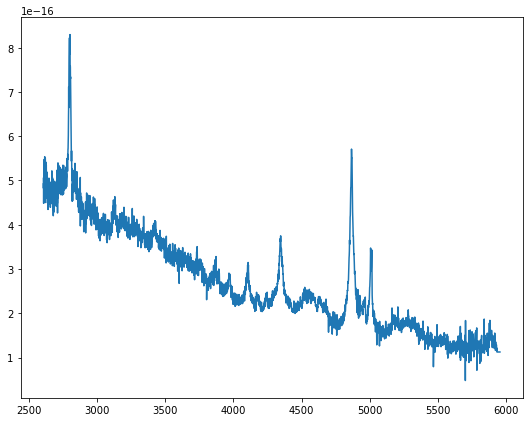

[0.458625] 093502.52+433110.6
1142.7634648300625 6319.1162818558705


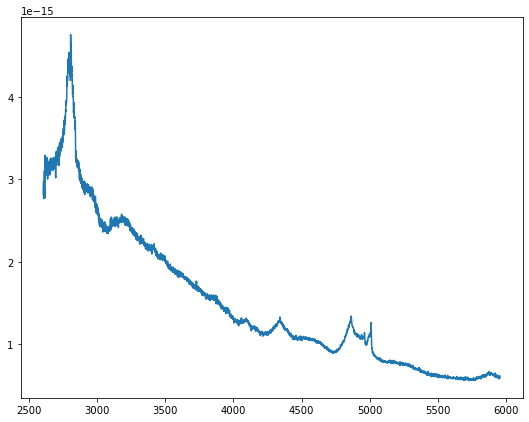

[0.505782] 100054.96+262242.4
1104.6835799406354 6125.448582142568


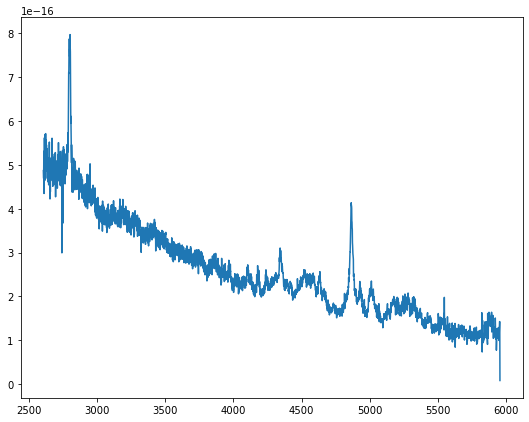

[0.535694] 103320.65+274024.2
1083.6656629618822 6006.1380827923995


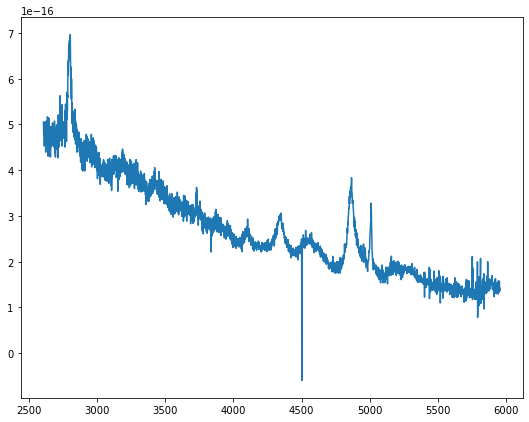

[0.465551] 111138.66+575030.0
1136.0542320228196 6293.598937816412


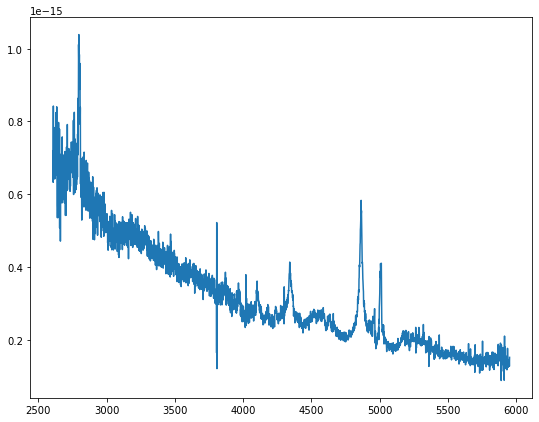

[0.488555] 111941.12+595108.7
1118.2402343744352 6196.338205115559


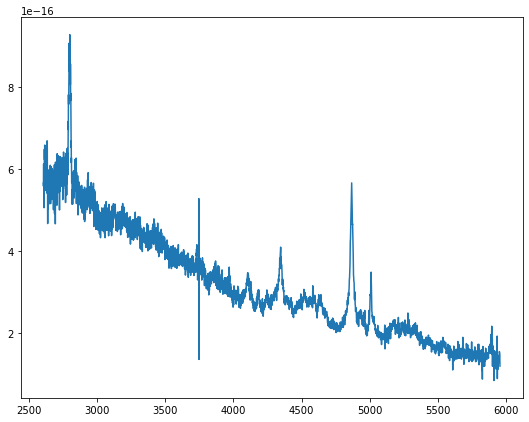

[0.475291] 112224.15+031802.6
1128.2940735619195 6252.04804809071


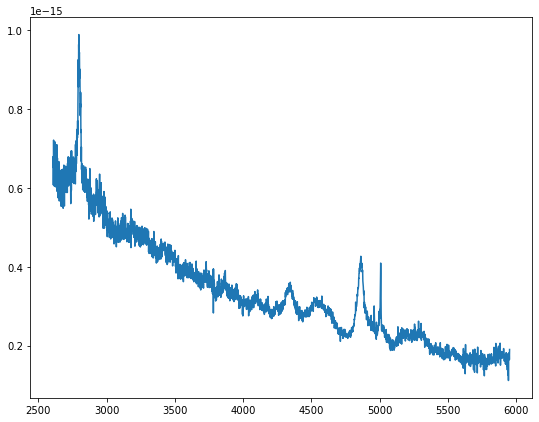

[0.495416] 112614.93+310146.6
1134.3262358167115 6167.909275355769


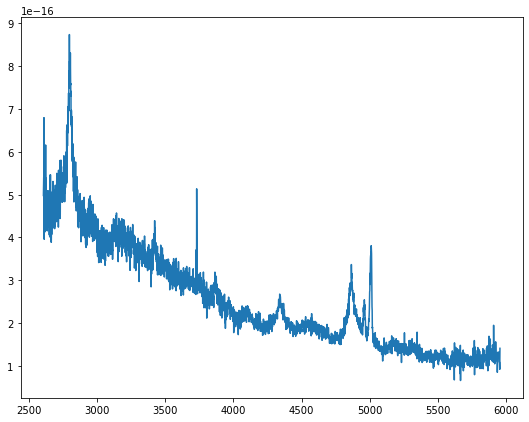

[0.524458] 113327.78+032719.1
1053.3787094331285 6050.406253840046


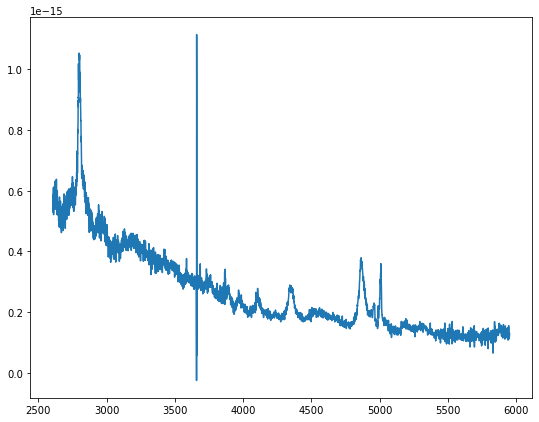

[0.471928] 113923.66+002301.6
1122.311552079324 6262.005333563999


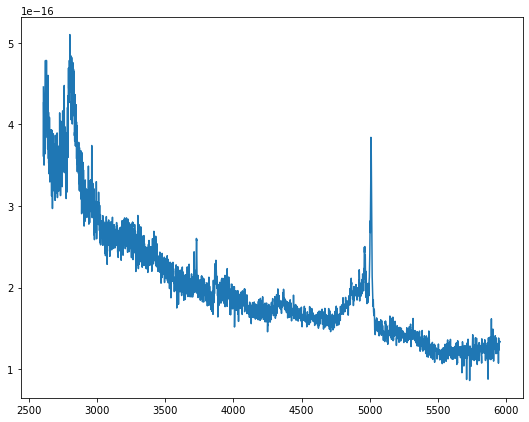

[0.46126] 123734.47+444731.7
1170.7724755343531 6310.626891364593


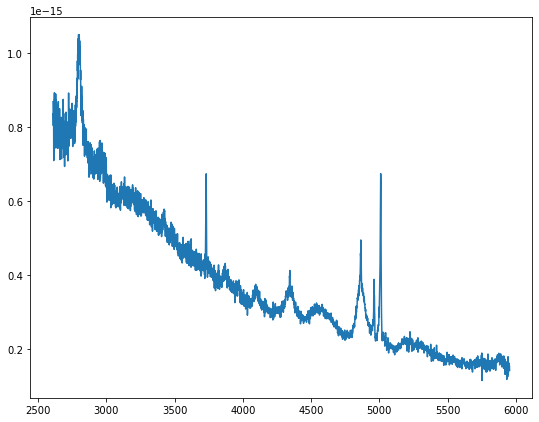

[0.50268] 125415.55+480850.6
1078.781509140471 6138.093417704567


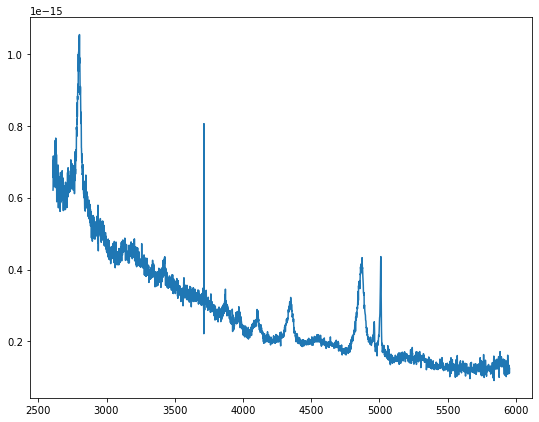

[0.463783] 131627.84+315825.7
1166.6035695276385 6301.200531031779


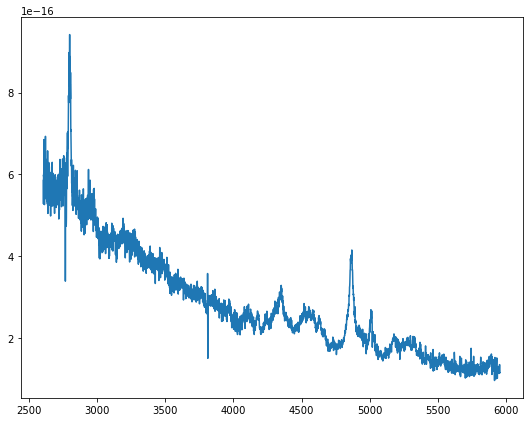

[0.502083] 134701.54+215401.1
1075.9846334101474 6137.705822214537


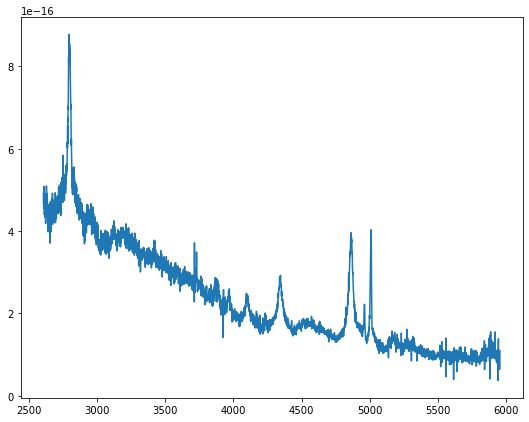

[0.45907] 140331.29+462804.8
1144.784846385056 6321.55428931835


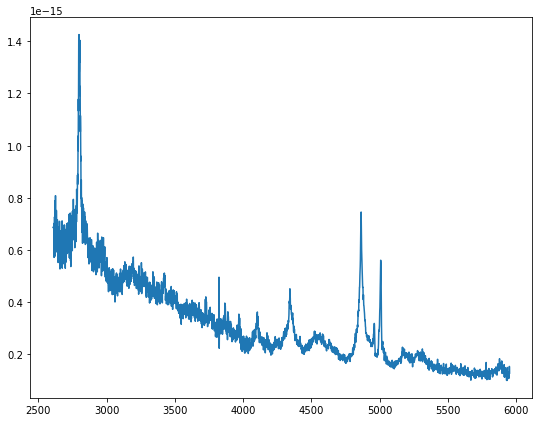

[0.464529] 145334.13+311401.4
1150.0110787035997 6297.990833172683


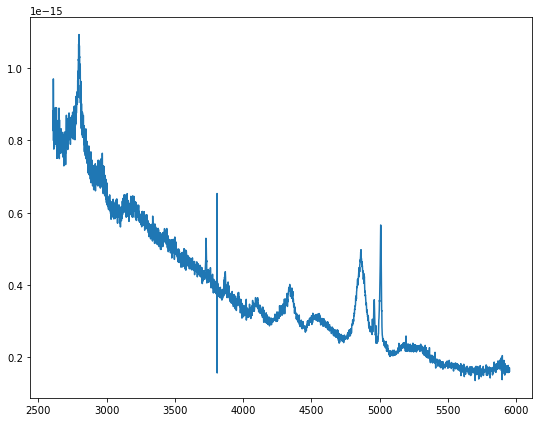

[0.481869] 152654.61+565512.3
1149.7149724525395 6217.133415111847


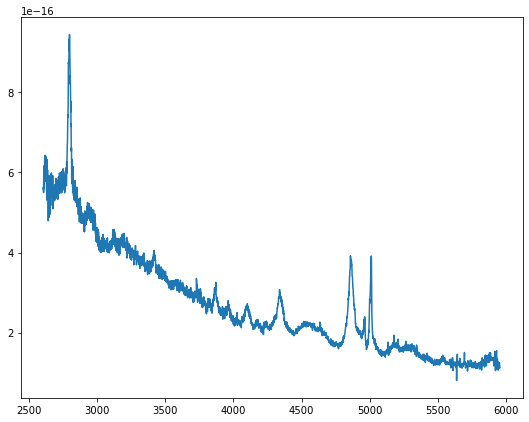

[0.517017] 155837.77+081345.8
1102.578583272015 6080.083622606534


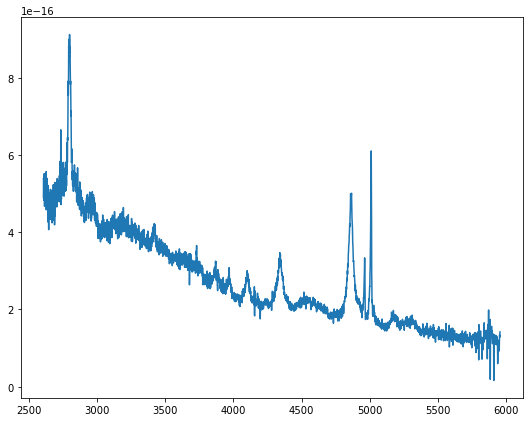

[0.524498] 234145.51-004640.5
1070.2201930833687 6037.72239620211


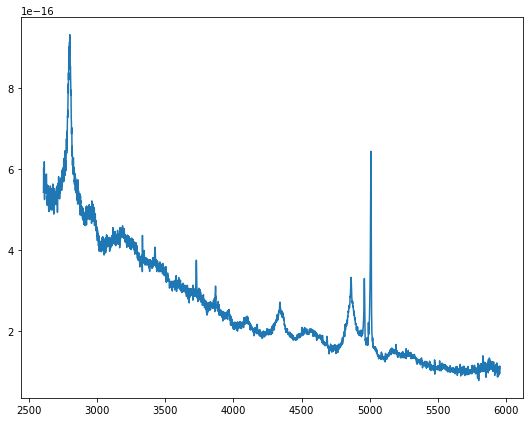

In [182]:
hst = []
wavelist= []
ivar= []
masks   = []

for spec in np.sort([f for f in os.listdir(path) if not f.startswith(".")]):
        z      = dat["Best_z"][dat["Identifier"]==spec[5:23]].values
        print(z, spec[5:23])
        hdul_spec = fits.open(path+spec)
        flux   = hdul_spec[1].data["Flux"]
        
        wav   = hdul_spec[1].data["Wavelength"] / (1+z)
        err    = hdul_spec[1].data["Flux Errors"]
        mask   = hdul_spec[1].data["Masks"]
        hdul_spec.close()
        print(min(wav), max(wav))
        wavemask = (wav>=2600)&(wav<=6006)

        fig = plt.figure(figsize=(9,7))
        plt.plot(wav[wavemask][13:3598], flux[wavemask][13:3598])
        plt.show()
        
        if np.isnan(flux[wavemask][13:3598]).any():
            print(flux[wavemask][:np.isnan(flux[wavemask]).sum()+1])

        #if len(hst)==0:
        hst.append(flux[wavemask][13:3598])#there's a one pixel difference in some hst
        wavelist.append(wav[wavemask][13:3598])
        ivar.append(err[wavemask][13:3598])
        masks.append(mask[wavemask][13:3598])
        
hst = np.array(hst)
wavelist = np.array(wavelist)
ivar = np.array(ivar)
masks = np.array(masks)

In [183]:
hst.shape

(25, 3585)

---

## Autoencoder

Need training data that covers wavelength range of all of these spectra.  The largest common wavelength range for the HST spectra is 2600-6005Å

DR14 covers 3610-10140 Å, so we can use the following redshift range for training data:

$$ z_\mathrm{min} = 3610/2600 - 1 = 0.389 $$ and

$$ z_\mathrm{max} = 10140/6005 - 1 = 0.688 $$

... which gives ~25000 spectra.

In [184]:
tab = Table.read("/Users/trevormccaffrey/Desktop/Research/GTR/VLA2018b/DR14/DR14Q_v4_4.fits", format="fits")
dr14 = tab.to_pandas()
dr14.head()

,SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,...,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
0,b'000000.45+174625.4',0.001898,17.773739,268270422,7596,56945,162,b'BOSS',2.30900,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1,-1.0,-1.0,-1.0
1,b'000000.57+055630.8',0.002375,5.941903,163544156,8740,57367,694,b'BOSS',2.10312,0.0,...,1.229889e-31,4.504542e-32,1.496425e-31,4.729050e-32,2.459819e-31,5.689572e-32,0,-1.0,-1.0,-1.0
2,b'000000.66+145828.8',0.002756,14.974675,244864389,6177,56268,595,b'BOSS',2.49700,0.0,...,2.310948e-31,4.565332e-32,2.355314e-31,5.970480e-32,2.427149e-31,6.521724e-32,0,-1.0,-1.0,-1.0
3,b'000000.97+044947.2',0.004052,4.829781,154078229,4415,55831,464,b'BOSS',1.61900,0.0,...,6.597500e-31,4.154652e-32,9.038160e-31,4.420332e-32,8.567425e-31,5.178768e-32,0,-1.0,-1.0,-1.0
4,b'000001.20+240354.5',0.005026,24.065163,319918739,7666,57339,121,b'BOSS',1.61621,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1,-1.0,-1.0,-1.0


In [185]:
(dr14["BI_CIV"]!=0).sum()

21877

In [186]:
((dr14["Z"]>0.39)&(dr14["Z"]<0.68)).sum()

26285

----

Load in the training data

In [187]:
dr14_sub = pd.read_csv("../data/DR14_zmin039_zmax068.csv")
dr14_sub.head()

,Unnamed: 0,SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,...,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
0,16,b'000001.95+052108.7',0.008146,5.352436,157846960,8740,57367,353,b'BOSS',0.403537,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,-1.0,-1.0,-1.0
1,61,b'000006.01-035334.1',0.025065,-3.892811,49938905,7034,56564,636,b'BOSS',0.675000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,-1.0,-1.0,-1.0
2,116,b'000010.97+005653.3',0.045749,0.948154,116692489,7848,56959,955,b'BOSS',0.653454,...,2.854058e-31,4.007125e-32,3.646568e-31,7.747647e-32,3.686837e-31,8.864307e-32,0,-1.0,-1.0,-1.0
3,121,b'000011.41+145545.6',0.047549,14.929355,-1,750,52235,499,b'SDSS',0.459700,...,1.155520e-30,4.696370e-32,1.732224e-30,6.154461e-32,2.770898e-30,6.820025e-32,0,-1.0,-1.0,-1.0
4,127,b'000011.96+000225.3',0.049839,0.040365,-1,387,51791,200,b'SDSS',0.478900,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,-1.0,-1.0,-1.0


In [188]:
z     = dr14_sub[["Z"]].values.flatten()
plate = dr14_sub[["PLATE"]].values.flatten()
mjd   = dr14_sub[["MJD"]].values.flatten()
fiber = dr14_sub[["FIBERID"]].values.flatten()
BAL   = dr14_sub[["BI_CIV"]].values.flatten()!=0

In [189]:
BAL.sum()

0

In [190]:
ls ../data/HST_train/lite/8740

spec-8740-57367-0094.fits  spec-8740-57367-0606.fits
spec-8740-57367-0174.fits  spec-8740-57367-0741.fits
spec-8740-57367-0178.fits  spec-8740-57367-0762.fits
spec-8740-57367-0213.fits  spec-8740-57367-0783.fits
spec-8740-57367-0353.fits  spec-8740-57367-0790.fits
spec-8740-57367-0390.fits  spec-8740-57367-0913.fits
spec-8740-57367-0429.fits  spec-8740-57367-0964.fits
spec-8740-57367-0501.fits  spec-8740-57367-0982.fits
spec-8740-57367-0528.fits


(0.0, 18.0)

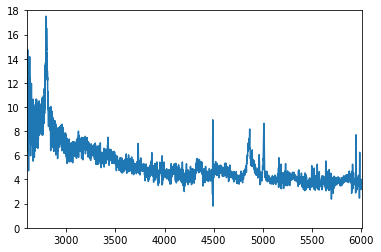

In [191]:
#Load in example FITS file
hdul_spec = fits.open("../data/HST_train/lite/8740/spec-8740-57367-0353.fits")
sdss_flux   = hdul_spec[1].data["flux"]
sdss_loglam = hdul_spec[1].data["loglam"]
sdss_wave   = 10.**(sdss_loglam)  / (1+0.403537) #x-axis: wavelength
sdss_ivar   = hdul_spec[1].data["ivar"]

plt.plot(sdss_wave, sdss_flux)
plt.xlim(2600,6006)
plt.ylim(-0,18)

In [192]:
((sdss_wave>2600) & (sdss_wave<6006)).sum()

3637

So rebinning worked well.  Although there are only 3598 pixels in some of the HST spectra, so just save the first 3598 for the retrieved SDSS spectra as well.

Load in the SDSS data

In [193]:
spec_path = "../data/HST_train/lite/"

spectra = [] #python list **way** faster than np.append - convert to array at end
wave    = []
N = 0

for red, pl, mj, fib, bal in zip(z, plate, mjd, fiber, BAL):
    try:
        hdul_spec = fits.open(spec_path+"%04d/spec-%04d-%05d-%04d.fits" % (pl,pl,mj,fib))
    except FileNotFoundError:
        #print(spec_path+"%04d/spec-%04d-%05d-%04d.fits NOT FOUND" % (pl,pl,mj,fib))
        continue
        
    #Load in data from each FITS file
    sdss_flux   = hdul_spec[1].data["flux"]
    sdss_loglam = hdul_spec[1].data["loglam"]
    sdss_wave   = 10.**(sdss_loglam) / (1+red)  #x-axis: wavelength
    
    #Want the same wavelength range for each array
    wavemask   = ((sdss_wave>2600) & (sdss_wave<6006))
    sdss_flux  = sdss_flux[wavemask]
    #sdss_flux /= np.median(sdss_flux) #normalize spectrum
    sdss_wave  = sdss_wave[wavemask]
    hdul_spec.close()
    
    if len(sdss_flux) >= 3598 and ~bal: #train on non-BALs in hope that this will prevent it from modeling troughs
        spectra.append(sdss_flux[13:3598]) #Some might have one extra pixel
        wave.append(sdss_wave[13:3598])
            
    N+=1
    if N%5000==0: print(N)
        
spectra = np.array(spectra)
wave = np.array(wave)

5000
10000
15000


In [194]:
wave.shape, spectra.shape

((16421, 3585), (16421, 3585))

---

Build autoencoder.  See, e.g., Chapters 11 and 17 of Geron, "Hands-on Machine Learning with Sci-kit Learn, Keras, and Tensorflow"

In [195]:
import tensorflow.keras.backend as K

In [196]:
n_latent = 12


#Build the encoder - the dimension of the final layer is the dimension of the latent space
stacked_encoder = keras.models.Sequential([
    keras.layers.Input(shape=spectra[0].shape),
    keras.layers.Dropout(0.3),
    #keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(200, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    #keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(50, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    #keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(n_latent, kernel_initializer="he_normal")
])

#Build the decoder - given values in latent space, it will reconstruct the original spectrum
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(50, kernel_initializer="he_normal", input_shape=[n_latent]),
    keras.layers.PReLU(),
    #keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(200, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    #keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(spectra[0].shape[0])#, kernel_initializer="lecun_normal", activation="selu") #no activation function since we want actual pixel values
])

#Now put them together
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

In [237]:
stacked_ae.compile(loss="logcosh", optimizer=keras.optimizers.Nadam(lr=6e-7))

In [238]:
X_train = spectra[:10000]
X_valid = spectra[10000:14000]
X_test  = spectra[14000:]

history = stacked_ae.fit(X_train, X_train, epochs=10,
                         validation_data=[X_valid, X_valid])

Train on 10000 samples, validate on 4000 samples
Epoch 1/10
10000/10000 [==============================] - 17s 2ms/sample - loss: 0.1303 - val_loss: 0.1147
Epoch 2/10
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.1296 - val_loss: 0.1146
Epoch 3/10
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.1293 - val_loss: 0.1147
Epoch 4/10
10000/10000 [==============================] - 15s 1ms/sample - loss: 0.1300 - val_loss: 0.1147
Epoch 5/10
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.1298 - val_loss: 0.1146
Epoch 6/10
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.1299 - val_loss: 0.1146
Epoch 7/10
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.1297 - val_loss: 0.1147
Epoch 8/10
10000/10000 [==============================] - 15s 2ms/sample - loss: 0.1297 - val_loss: 0.1146
Epoch 9/10
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.1302 - val_l

In [239]:
test_num = 202
reconst = stacked_ae.predict(np.array([X_test[test_num]]))

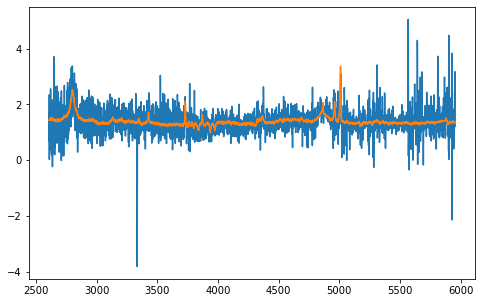

In [240]:
fig = plt.figure(figsize=(8,5))

#plt.plot(wave[800], spectra[800])
plt.plot(wave[14000+test_num], X_test[test_num])
plt.plot(wave[14000+test_num], reconst[0])
plt.show()

In [241]:
n_spectra = 30
reconst = stacked_ae.predict(np.array(X_test[:n_spectra]))

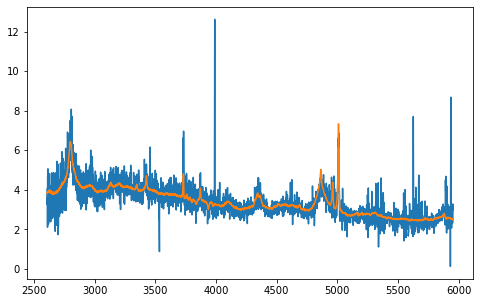

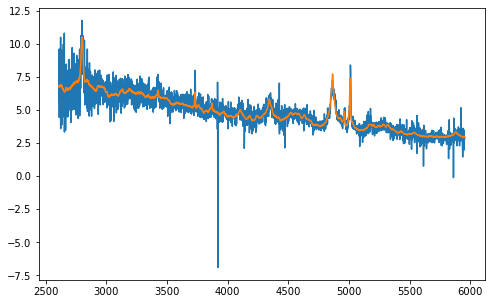

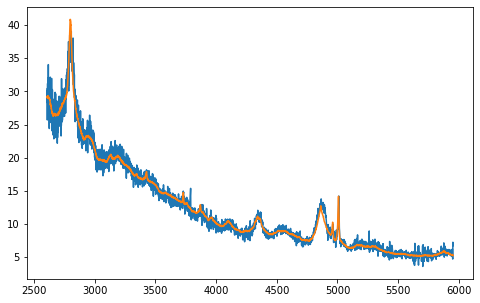

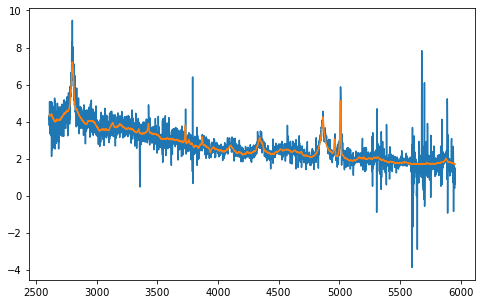

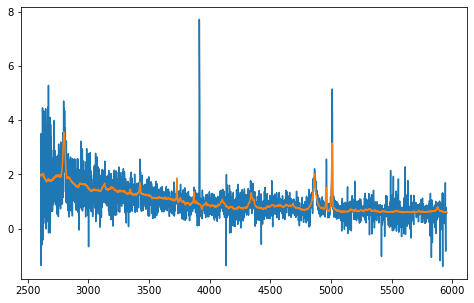

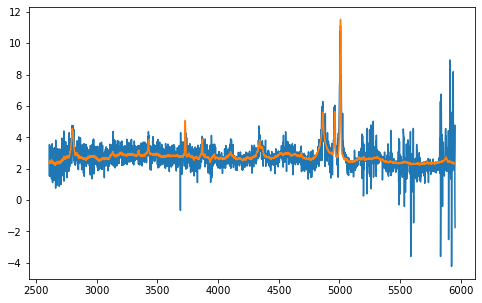

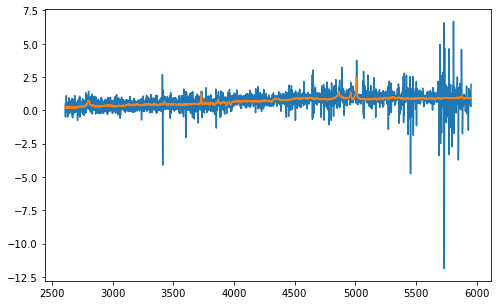

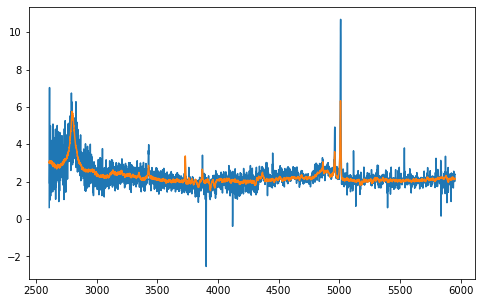

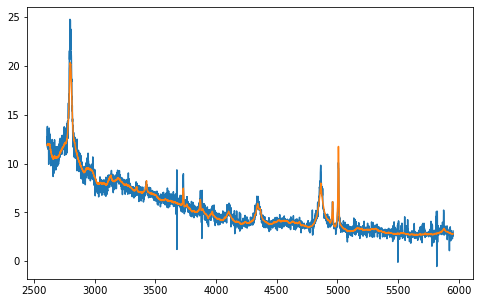

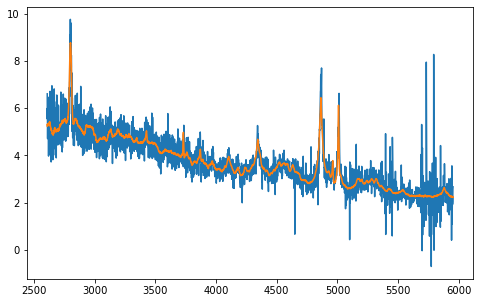

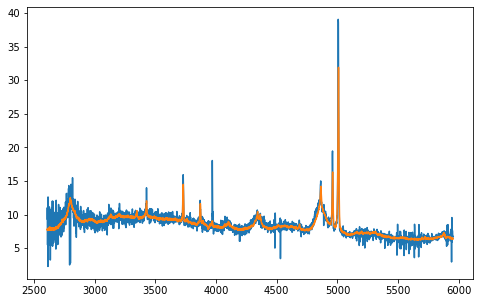

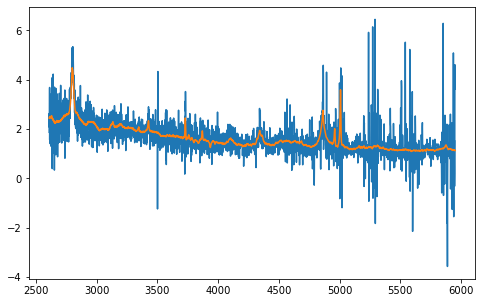

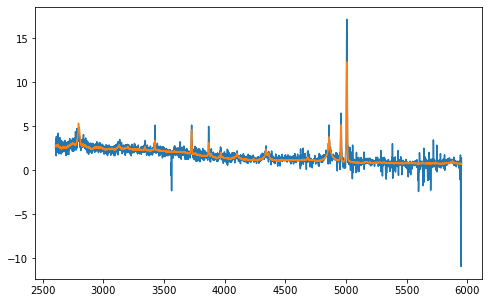

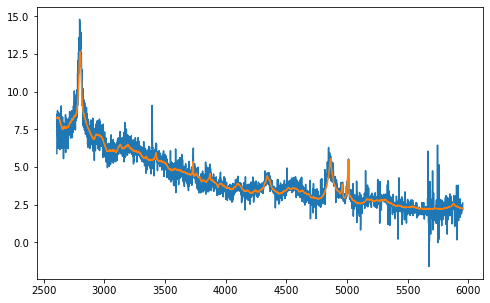

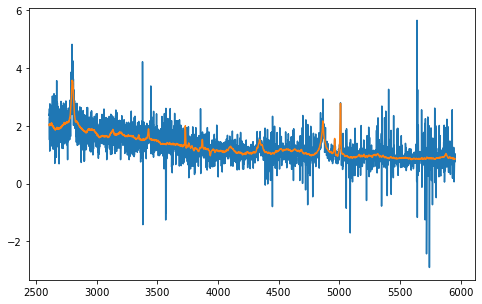

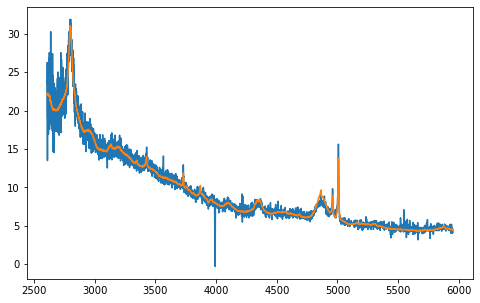

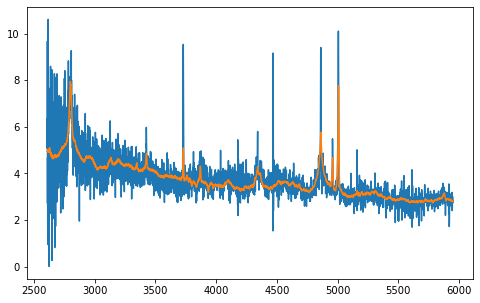

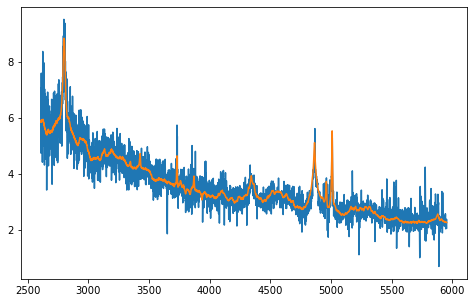

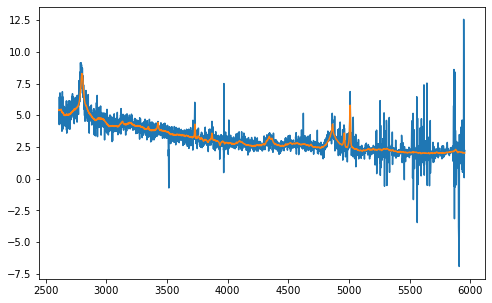

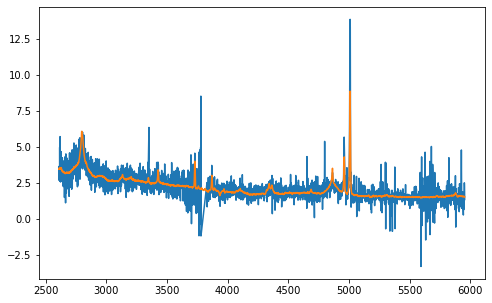

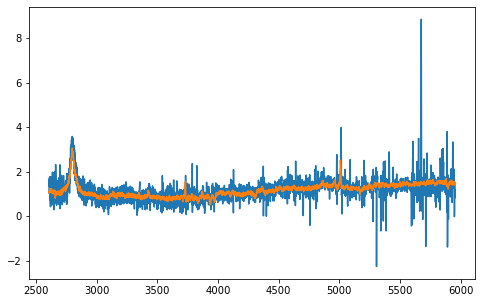

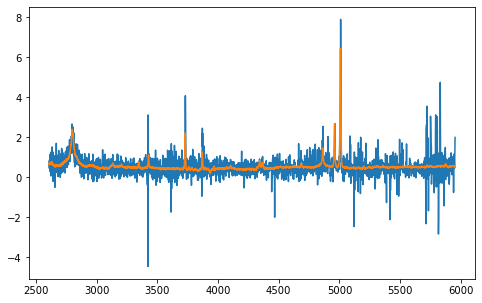

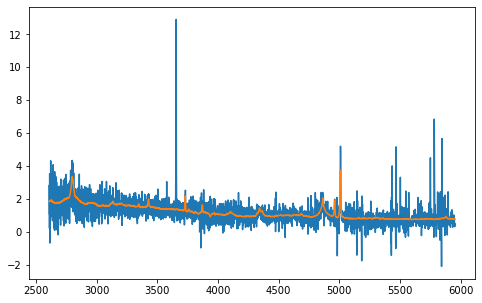

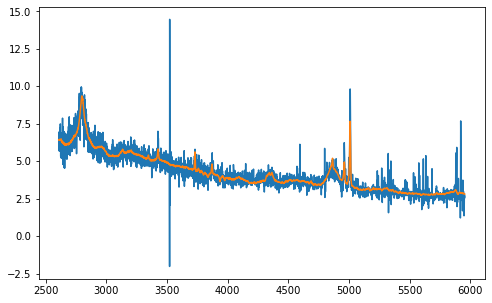

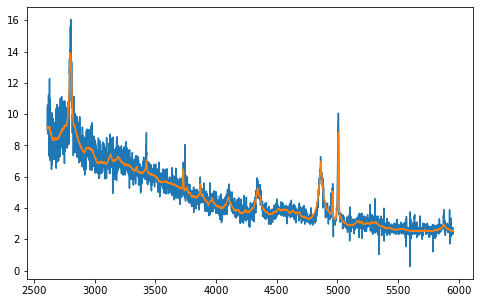

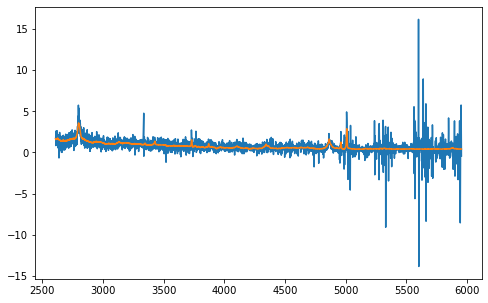

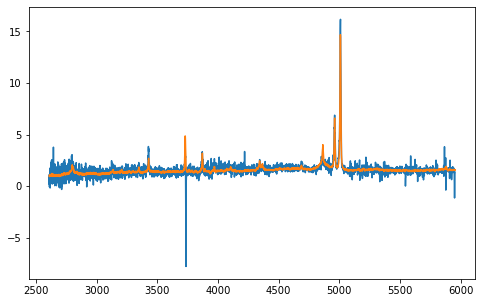

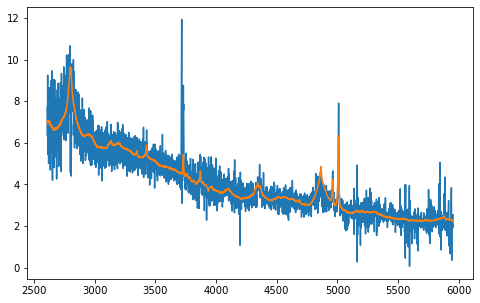

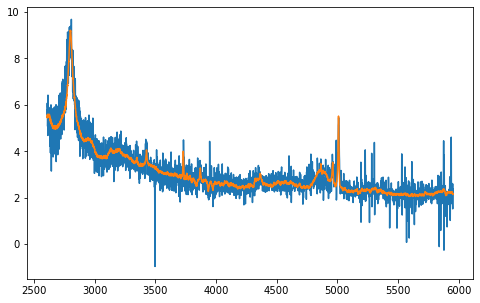

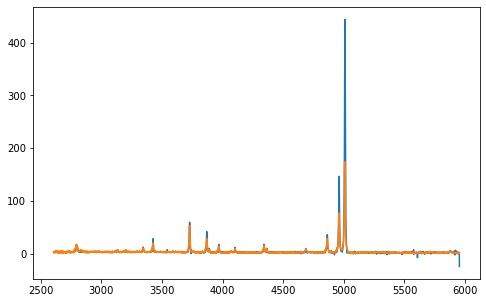

In [242]:
for i in range(n_spectra):
    #reconst = stacked_ae.predict(np.array([X_valid[i]]))
    fig = plt.figure(figsize=(8,5))
    plt.plot(wave[14000+i], X_test[i])
    plt.plot(wave[14000+i], reconst[i])
    plt.show()

In [243]:
hst_reconst = stacked_ae.predict(hst*1e16)

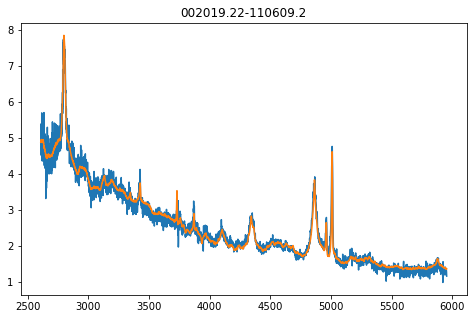

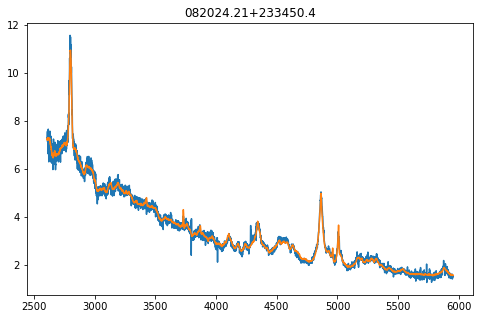

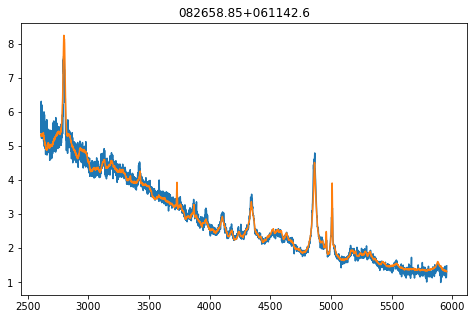

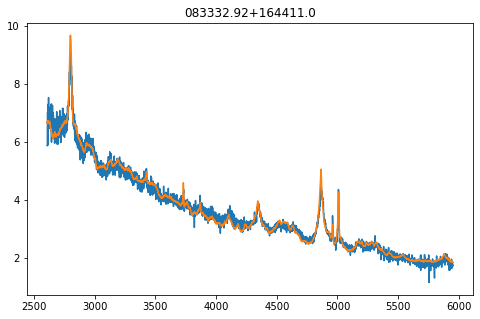

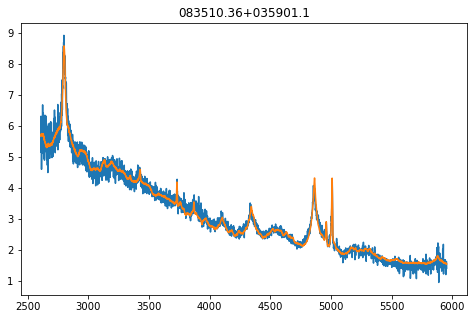

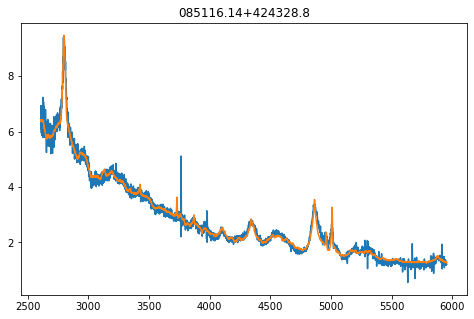

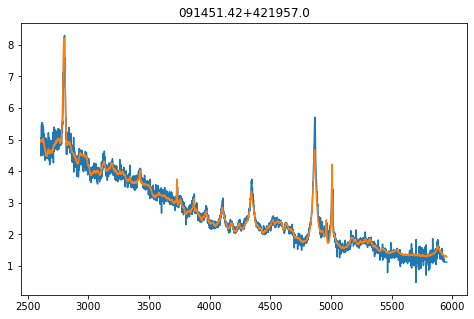

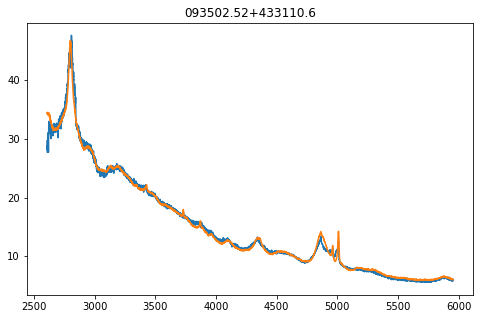

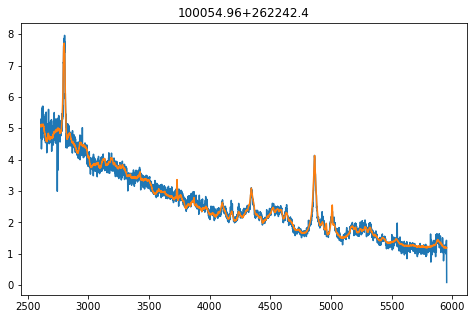

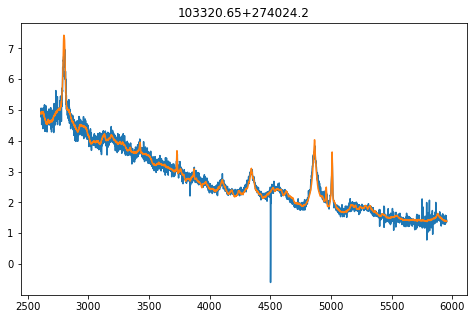

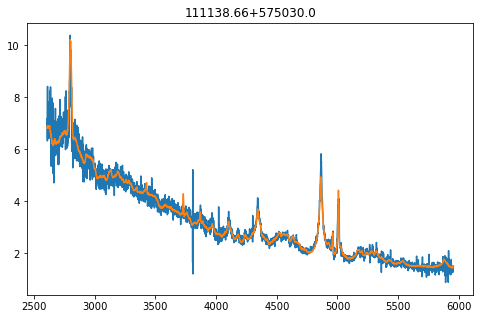

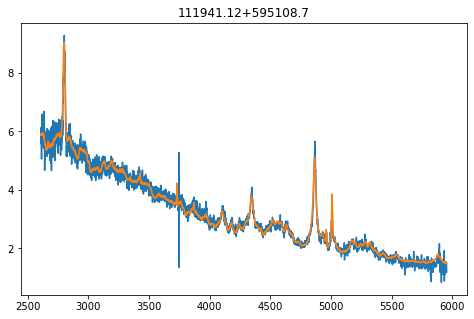

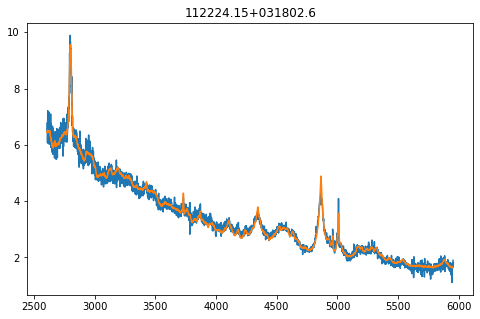

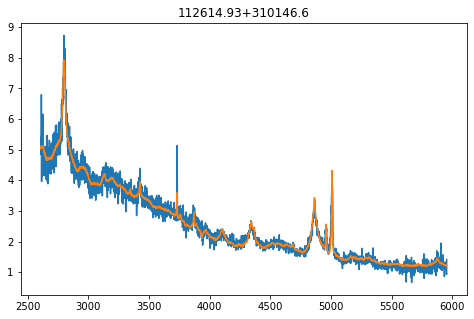

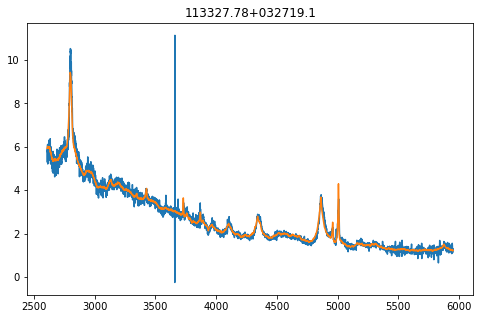

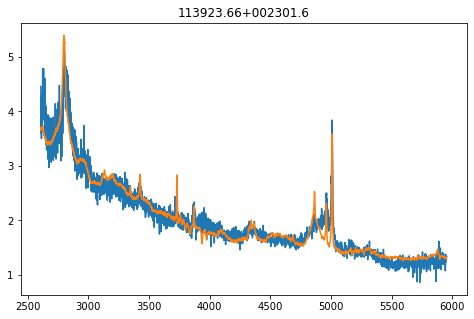

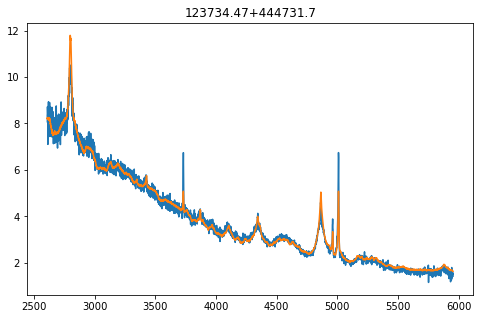

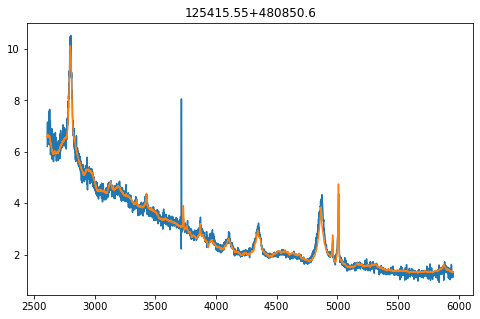

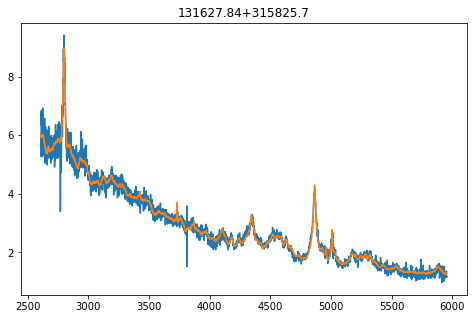

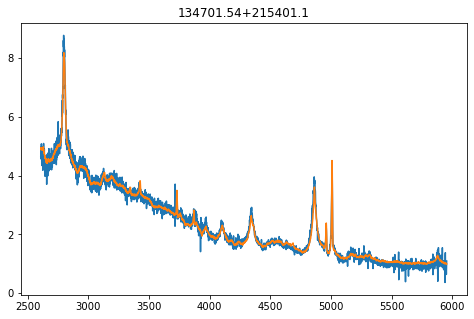

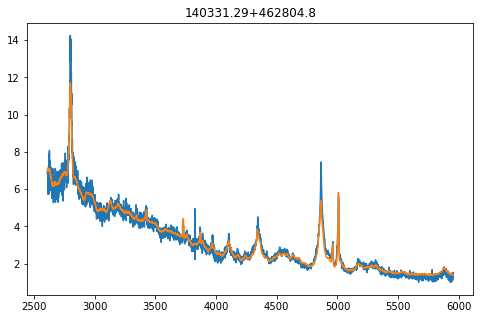

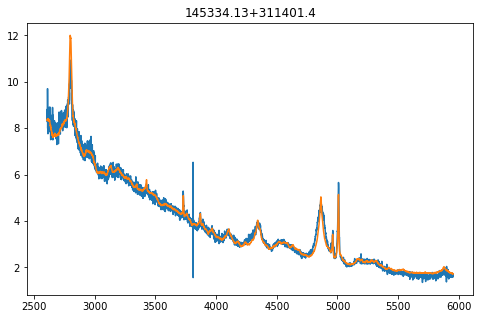

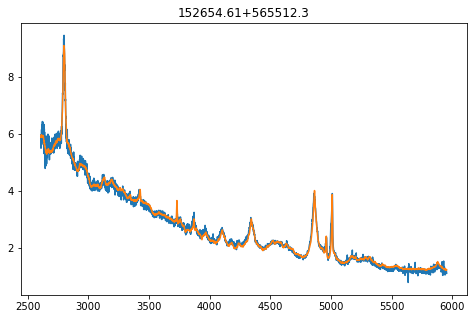

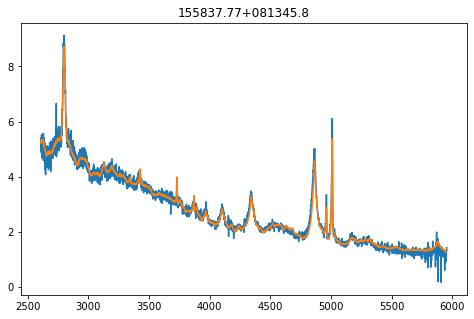

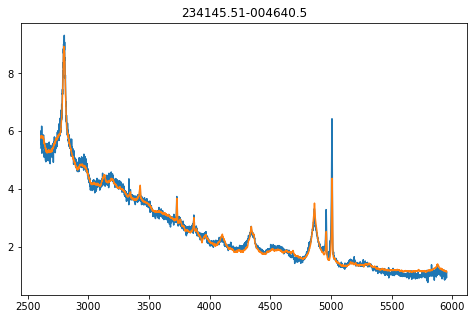

In [244]:
for i in range(len(hst)):
    fig = plt.figure(figsize=(8,5))
    plt.plot(wavelist[i], hst[i]*1e16)
    plt.plot(wavelist[i], hst_reconst[i])
    plt.title(dat["Identifier"][i])
    plt.show()

In [305]:
bestICA(0)

(array([1260.0855, 1260.3756, 1260.6659, ..., 2998.472 , 2999.1625,
        2999.8532]),
 array([2.27672634, 2.27348464, 2.29311181, ..., 0.53207876, 0.53041422,
        0.53274434]))

I'm now thinking maybe more thought should go into building the training set.  E.g., don't just randomly select from all quasars, pick an equal amount at each line strength.  Maybe not needed right now.

In [245]:
def same_length(var, longvar):
    #append nans to the end of var to give it the same length as longvar
    return np.array(list(var) + [np.nan]*(len(longvar)-len(var)))

In [249]:
path_full = "../data/HST_Reconstructions_sudo/"

In [250]:
for i,spec in enumerate(np.sort([f for f in os.listdir(path_full) if not f.startswith(".")])):
    print(spec)

SDSSJ002019.22-110609.2HSTSDSS_wreconsts.fits
SDSSJ082024.21+233450.4HSTSDSS_wreconsts.fits
SDSSJ082658.85+061142.6HSTSDSS_wreconsts.fits
SDSSJ083332.92+164411.0HSTSDSS_wreconsts.fits
SDSSJ083510.36+035901.1HSTSDSS_wreconsts.fits
SDSSJ085116.14+424328.8HSTSDSS_wreconsts.fits
SDSSJ091451.42+421957.0HSTSDSS_wreconsts.fits
SDSSJ093502.52+433110.6HSTSDSS_wreconsts.fits
SDSSJ100054.96+262242.4HSTSDSS_wreconsts.fits
SDSSJ103320.65+274024.2HSTSDSS_wreconsts.fits
SDSSJ111138.66+575030.0HSTSDSS_wreconsts.fits
SDSSJ111941.12+595108.7HSTSDSS_wreconsts.fits
SDSSJ112224.15+031802.6HSTSDSS_wreconsts.fits
SDSSJ112614.93+310146.6HSTSDSS_wreconsts.fits
SDSSJ113327.78+032719.1HSTSDSS_wreconsts.fits
SDSSJ113923.66+002301.6HSTSDSS_wreconsts.fits
SDSSJ123734.47+444731.7HSTSDSS_wreconsts.fits
SDSSJ125415.55+480850.6HSTSDSS_wreconsts.fits
SDSSJ131627.84+315825.7HSTSDSS_wreconsts.fits
SDSSJ134701.54+215401.1HSTSDSS_wreconsts.fits
SDSSJ140331.29+462804.8HSTSDSS_wreconsts.fits
SDSSJ145334.13+311401.4HSTSDSS_wre

In [253]:
for i,spec in enumerate(np.sort([f for f in os.listdir(path_full) if not f.startswith(".")])):
    hdul_spec = fits.open(path_full+spec)
    
    flux   = hdul_spec[1].data["Flux"]
    wav   = hdul_spec[1].data["Wavelength"] 
    err    = hdul_spec[1].data["Flux Errors"]
    specmask   = hdul_spec[1].data["Masks"]
    AE_UV   = hdul_spec[1].data["AE_UV"]
    ICA_UV = hdul_spec[1].data["ICA_UV"]
    
    AE_OPT = hst_reconst[i]*1e-16
    
    t = Table([wav, flux, err, specmask, AE_UV, ICA_UV, same_length(AE_OPT, flux)], \
              names=('Wavelength', 'Flux', 'Flux Errors', 'Masks', 'AE_UV', 'ICA_UV', 'AE_OPT'))
    t.write('../data/HST_Reconstructions/'+spec, format='fits')
    #hdul.flush()
    hdul_spec.close()